In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras
import sklearn

plt.style.use('seaborn')
sns.set(font_scale=2.5)
# 위 두 줄을 사용하면 matplotlib의 기본 scheme말고 seaborn scheme을 세팅하여
# 일일이 graph의 font size를 지정할 필요 없이 seaborn의 font_scale을 사용하면 편함

import warnings
warnings.filterwarnings('ignore') # 워닝 메세지를 생략해줌

%matplotlib inline

In [4]:
os.listdir("titanicdata") # input 경로에 있는 파일리스트를 확인할 수 있음

['sample_submission.csv', 'test.csv', 'train.csv']

In [5]:
df_train = pd.read_csv("titanicdata/train.csv")
df_test = pd.read_csv("titanicdata/test.csv")
df_submit = pd.read_csv("titanicdata/sample_submission.csv") # 파일 읽어 오기

In [6]:
df_train.shape, df_test.shape, df_submit.shape
# 파일의 크기를 확인하는 함수 shape

# train -> 891개 (행의 갯수인거 같음)
# test(제출해야)할 데이터 수는 418개

((891, 12), (418, 11), (418, 2))

In [7]:
df_train.columns # df_train의 컬럼들을 확인

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
df_submit.columns # submit 파일에 최종적으로 들어갈 컬럼들

Index(['PassengerId', 'Survived'], dtype='object')

In [14]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [16]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [17]:
df_submit.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [22]:
print(df_train.dtypes)
df_train.describe() # count의 값으로 결측치가 있는지 없는지 확인이 가능하다

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [24]:
df_train.isnull().sum() / df_train.shape[0]
# 결과를 보면 age와 cabin 피쳐에 약 20%, 80%의 결측치가 있다는 것을 알 수 있다

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [14]:
# Pclass에 따른 생존률 차이를 출력해보기
# pandas dataframe에서는 groupby를 사용할 수 있다, pivot도 있음


# pclass 그룹 별 데이터 카운트
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index = True).count()

# as_index: groupby로 묶을 피쳐를 index로 쓸 것인지 아닌지

,Survived
Pclass,
1,216
2,184
3,491


In [32]:
# pclass 그룹 별 생존자 수 합
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index = True).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [20]:
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins = True)

# margin은 총 합을 보고 싶을 때 사용

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [39]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean()

# mean()을 이용해서 평균을 pclass별 평균을 구할 수 있다

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


<AxesSubplot:xlabel='Pclass'>

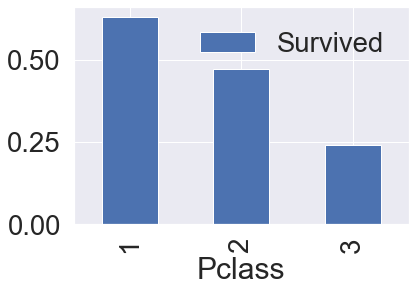

In [41]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().plot.bar()

# pandas 데이터프레임으로 그래프를 그리는 방법은, matplotlib.pyplpot, pandas.plot(), seaborn 등이 있지만, 
# 여기서는 pandas.plot() 을 기본으로 사용한다.

각 피쳐들의 값을 이런 식으로 확인해보면서 각각의 상관관계를 해보면서 raw데이터의 어떤 값 (feature)을 사용해야 하는지를 정할 수 있다

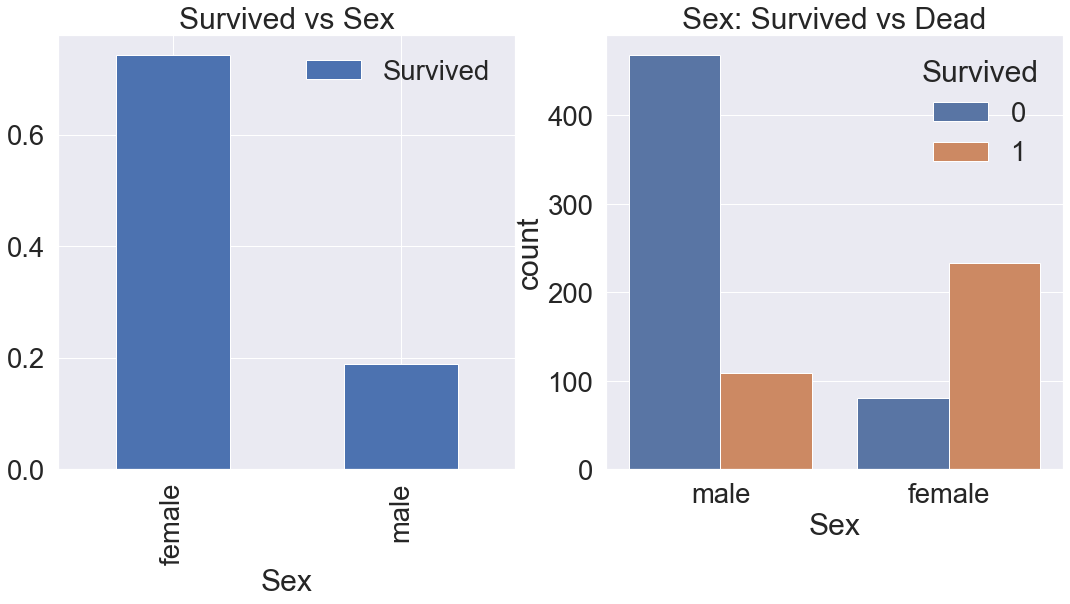

In [47]:
f, ax = plt.subplots(1, 2, figsize = (18, 8))
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax = ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex', hue='Survived', data = df_train, ax = ax[1])
# hue: 데이터프레임에 있는 피쳐들의 구분되는 값들에 따라 그래프를 그려줌
# hue에 들어갈 값은 데이터 프레임의 피쳐값(컬럼 값) 이어야 함
# Survived를 선택하면 0 또는 1 (죽거나 살거나)로 구분되고 data에 groupby의 값이 들어가고 그래프가 그려짐
ax[1].set_title('Sex: Survived vs Dead')
plt.show()

In [53]:
print('제일 나이가 많은 탑승객: {0} Years'.format(df_train['Age'].max()))
print('제일 나이가 어린 탑승객: {0} Years'.format(df_train['Age'].min()))
print('탑승객 평균 나이: {:.1f} Years'.format(df_train['Age'].mean()))

제일 나이가 많은 탑승객: 80.0 Years
제일 나이가 어린 탑승객: 0.42 Years
탑승객 평균 나이: 29.7 Years


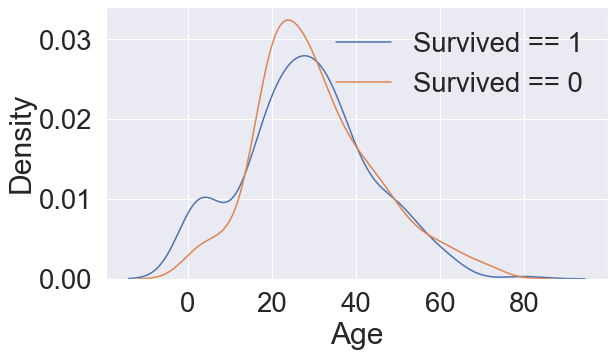

In [59]:
fig, ax = plt.subplots(1, 1, figsize=(9, 5)) # 그래프를 같은 곳에 그리기 위해 1,1로 입력
sns.kdeplot(data = df_train[df_train['Survived'] == 1]['Age'], ax = ax)
sns.kdeplot(data = df_train[df_train['Survived'] == 0]['Age'], ax = ax)

plt.legend(['Survived == 1', 'Survived == 0']) # 범례 추가하기
plt.show()

# 위와 아래 코드는 같다
# 위: seaborn의 kdeplot을 사용하는 경우
# 아래: dataframe의 plot을 사용하는 경우 kind->plot의 종류를 결정 할 수 있는거 같다 이 경우 kde를 선택

'''
plt.figure(figsize=(9, 5))
df_train[df_train['Survived'] == 1]['Age'].plot(kind='kde')
df_train[df_train['Survived'] == 0]['Age'].plot(kind='kde')
plt.legend(['Survived == 1', 'Survived == 0']) # 범례 추가하기
'''

- 나이 구간별 생존 밀도를 한 눈에 알 수 있다.

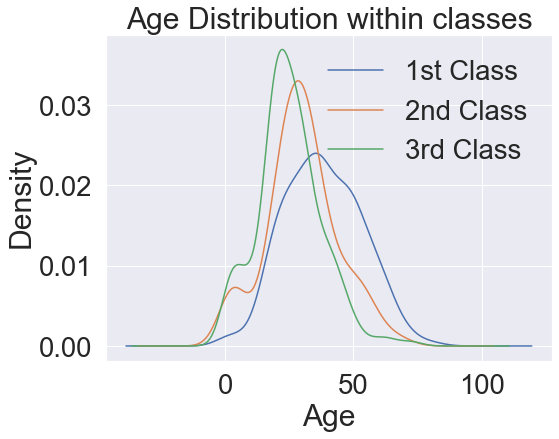

In [63]:
# Age distribution withing classes

plt.figure(figsize=(8, 6))
df_train['Age'][df_train['Pclass'] == 1].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 2].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 3].plot(kind='kde')

plt.xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['1st Class', '2nd Class', '3rd Class'])

- 범례를 Pclass로 하여 분포를 보게 되면 클래스가 높아질 수록, 생존 연령대가 높아지는 관계가 있다는 것을 알 수 있다.

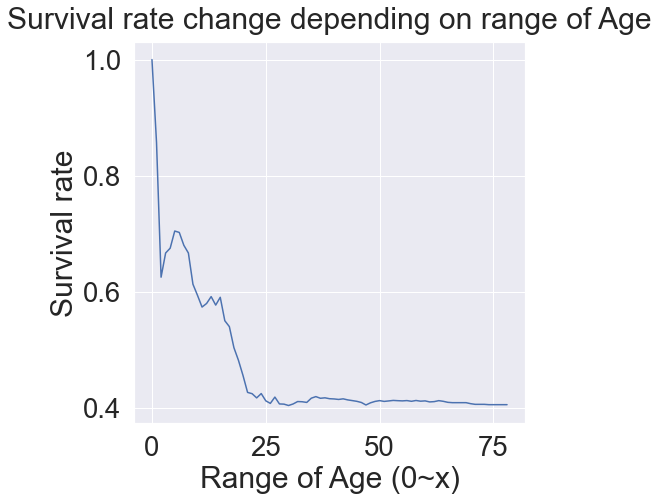

In [70]:
cummulate_survival_ratio = []
for i in range(1, 80):
    cummulate_survival_ratio.append(df_train[df_train['Age'] < i]['Survived'].sum() / len(df_train[df_train['Age'] < i]['Survived']))

plt.figure(figsize=(7,7))
plt.plot(cummulate_survival_ratio)
plt.title('Survival rate change depending on range of Age', y = 1.02)
plt.ylabel('Survival rate')
plt.xlabel('Range of Age (0~x)')
plt.show()